In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((523, 12, 1), (523,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2188 - root_mean_squared_error: 0.4678

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 6s 74ms/step - loss: 0.2206 - root_mean_squared_error: 0.4697 - val_loss: 0.2339 - val_root_mean_squared_error: 0.4837
Epoch 2/50
40/53 [=====================>........] - ETA: 0s - loss: 0.1777 - root_mean_squared_error: 0.4215

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.1730 - root_mean_squared_error: 0.4159 - val_loss: 0.1914 - val_root_mean_squared_error: 0.4375
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1460 - root_mean_squared_error: 0.3821

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.1426 - root_mean_squared_error: 0.3776 - val_loss: 0.1495 - val_root_mean_squared_error: 0.3866
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.1115 - root_mean_squared_error: 0.3340

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.1115 - root_mean_squared_error: 0.3340 - val_loss: 0.1205 - val_root_mean_squared_error: 0.3471
Epoch 5/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0898 - root_mean_squared_error: 0.2997

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0859 - root_mean_squared_error: 0.2930 - val_loss: 0.1022 - val_root_mean_squared_error: 0.3196
Epoch 6/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0686 - root_mean_squared_error: 0.2619

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0677 - root_mean_squared_error: 0.2601 - val_loss: 0.0771 - val_root_mean_squared_error: 0.2777
Epoch 7/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0519 - root_mean_squared_error: 0.2278

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0519 - root_mean_squared_error: 0.2277 - val_loss: 0.0655 - val_root_mean_squared_error: 0.2559
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.0368 - root_mean_squared_error: 0.1918

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2201
Epoch 9/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0300 - root_mean_squared_error: 0.1731

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0296 - root_mean_squared_error: 0.1721 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1847
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1576

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1670
Epoch 11/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0163 - root_mean_squared_error: 0.1277

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1289
Epoch 12/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1322

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0171 - root_mean_squared_error: 0.1309 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1147
Epoch 13/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1123

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 14/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1251

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0842
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0152 - root_mean_squared_error: 0.1234 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 18/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0722
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 20/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1076

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0718
Epoch 21/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1103

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0096 - root_mean_squared_error: 0.0980 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1042 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0075 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


INFO:tensorflow:Assets written to: Pacific_model_LT4\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0107 - root_mean_squared_error: 0.1032 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0106 - root_mean_squared_error: 0.1031 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 46/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0957
Epoch 47/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0729
Epoch 48/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0099 - root_mean_squared_error: 0.0997 - val_loss: 0.0049 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.265966240564982 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

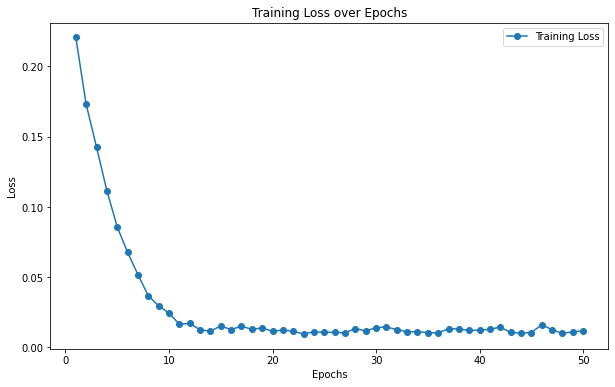

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

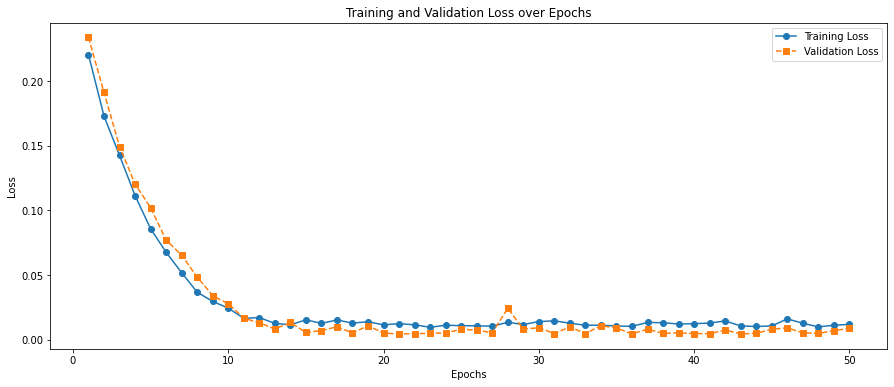

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.06830334537686482
MAE : 0.05407927966367906


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.741918e+06,1890231.668
1,1.851978e+06,2203401.829
2,1.757856e+06,1960480.542
3,1.341508e+06,1264318.504
4,7.502585e+05,863206.294
5,4.496711e+05,635624.004
6,3.316199e+05,460009.672
7,4.897160e+05,610848.036
8,7.370642e+05,819257.445
9,1.222614e+06,1129627.707


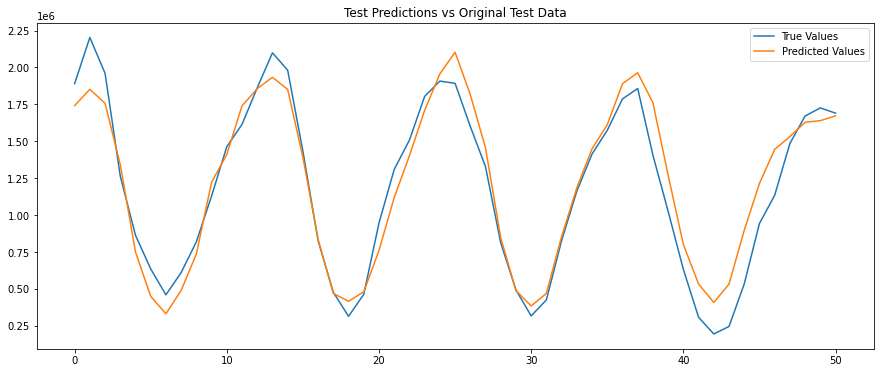

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

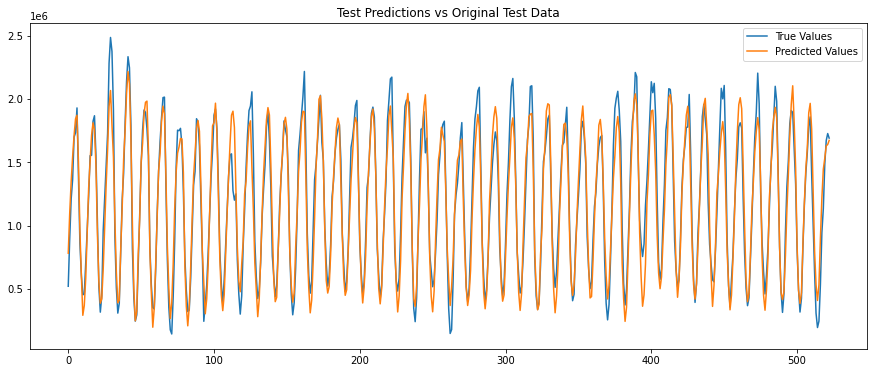

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()